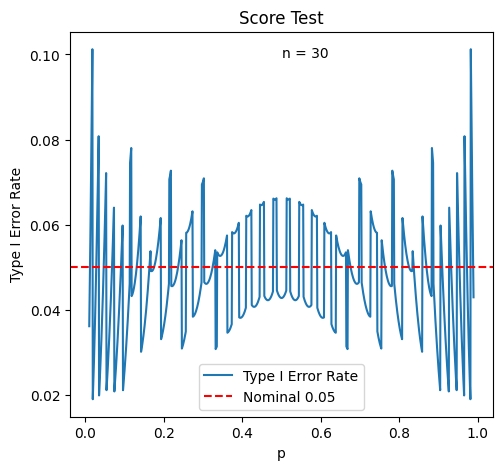

/tmp/ipykernel_1586/712195951.py:56: RuntimeWarning: divide by zero encountered in divide
  return (p_hat - p0) / SE_hat


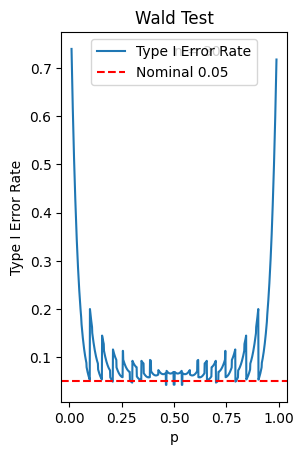

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

def calculate_type_i_error_rate(p_true, n, test, alpha=0.05): 
    
    """
    Gives Type I error rate with h0 being true and having p = p_true. Calculates all the possible success
    outcomes and probabilities with p_true an binomial distribution experiment with size n
    The method then sees if those outcomes would be rejected by hypothesis test and sums up all rejected value probabilities 

    Args:
    p_true (float): true population proportion.
    n (int): sample size.
    test (function): function of p_hat, n, and p_0 that computes test stat.
    alpha (float): significance level.

    Returns:
    float: Type I error rate .
    """
    x = np.arange(0, n + 1) # Gets all possible experiment success counts from 0 to n
    p_x = binom.pmf(x, n, p_true) # Gets the probabilities of all possible success values from 0 to n with probability p0=p_true
    # The above x simulates the outcomes a sample might have and p_x is the probability of getting each of those outcomes with p0=p_true
    test_stats = test(p_hat=x / n, sample_size=n, p0=p_true) # Gets the z score of having x successes from n with p0=p_true as the hypothesized probability of success. 
    reject = np.abs(test_stats) > norm.ppf(1 - alpha / 2) # Determines if the null hypothesis should be rejected based on the z score and the alpha level
    return np.sum(reject * p_x) # # Returns the sum of the probabilities of all the values of x that would lead to rejecting the null hypothesis

def get_score_test_stat(p_hat, sample_size, p0):
    """
    Score test statistic computation.

    Args:
    p_hat (float): sample proportion.
    sample_size (int): sample size.
    p0 (float): hypothesized population proportion.

    Returns:
    float: Score test statistic.
    """
    SE_0 = np.sqrt(p0 * (1 - p0) / sample_size)
    return (p_hat - p0) / SE_0

def get_wald_test_stat(p_hat, sample_size, p0):
    """
    Wald test statistic computation.

    Args:
    p_hat (float): sample proportion.
    sample_size (int): sample size.
    p0 (float): hypothesized population proportion.

    Returns:
    float: Wald test statistic.
    """
    SE_hat = np.sqrt(p_hat * (1 - p_hat) / sample_size)
    return (p_hat - p0) / SE_hat


def plot_type_i_error_rate(n, test, alpha=0.05, title=''):
    """
For all possible true population proportions from 0.01 to 0.99, calculate the type I error rate by summing up the probabilities of 
all the values of x that would lead to rejecting the null hypothesis with given test statistic and nomina.
    Args:
    n (int): sample size.
    test (function): test statistic function.
    alpha (float): significance level.
    title (str): title of the plot.
    """
    p_seq = np.arange(0.01, 0.99, 0.001) # All possible true binomial proportions from 0.01 to 0.99
    size = np.array([calculate_type_i_error_rate(p, n, test, alpha) for p in p_seq])

    plt.plot(p_seq, size, label='Type I Error Rate')
    plt.axhline(y=alpha, color='red', linestyle='--', label=f'Nominal {alpha}')
    plt.xlabel('p')
    plt.ylabel('Type I Error Rate')
    plt.title(title)
    plt.text(0.5, 0.98 * np.max(size), f'n = {n}')
    plt.legend()
    plt.show()

def type_i_error_rate_comparison(n, alpha=0.05):
    """
    Plot the size comparison between Score Test and Wald Test.

    Args:
    n (int): sample size.
    
    nominal (float): nominal size of the test.
    """
    plt.figure(figsize=(12, 5))

    # Score Test
    plt.subplot(1, 2, 1)
    plot_type_i_error_rate(n, get_score_test_stat, alpha, title='Score Test')

    # Wald Test
    plt.subplot(1, 2, 2)
    plot_type_i_error_rate(n, get_wald_test_stat, alpha, title='Wald Test')

    plt.tight_layout()
    plt.show()

# Example usage: plotting for sample size of 30
type_i_error_rate_comparison(30)

/tmp/ipykernel_1586/712195951.py:56: RuntimeWarning: divide by zero encountered in divide
  return (p_hat - p0) / SE_hat


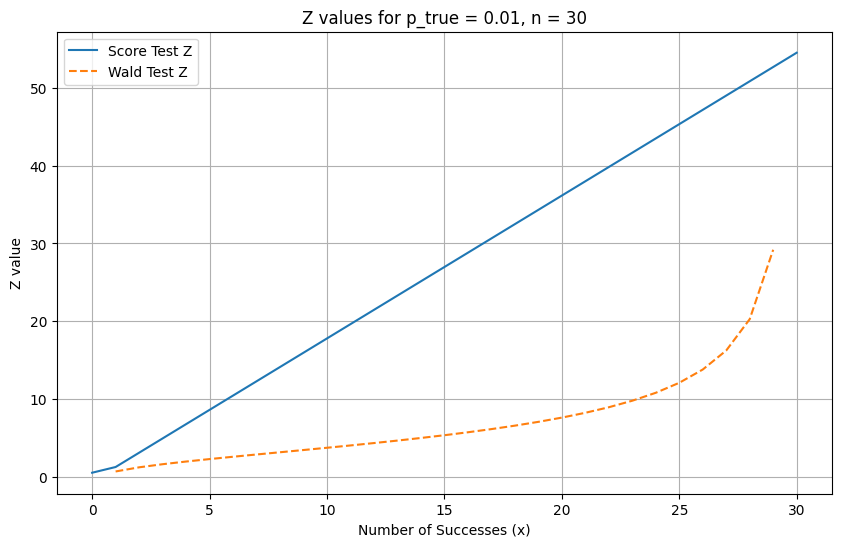

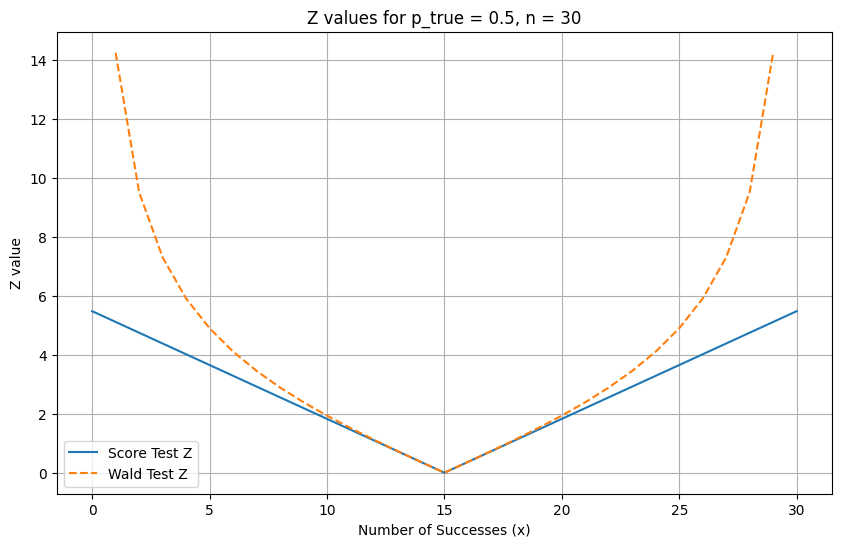

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_z_values_for_p_true(p_true_list, n):
    """
    Plots Z values from both Score and Wald tests for given p_true values and sample size n.

    Args:
    p_true_list (list): List of true population proportions (p_true) to plot.
    n (int): Sample size.
    """
    for p_true in p_true_list:
        x = np.arange(0, n + 1)
        p_hat = x / n
        p0 = p_true  # Null hypothesis proportion

        # Score Test Z values

        z_wald = np.abs(get_wald_test_stat(p_hat, n, p0))
        z_score = np.abs(get_score_test_stat(p_hat, n, p0))

        plt.figure(figsize=(10, 6))
        plt.plot(x, z_score, label='Score Test Z')
        plt.plot(x, z_wald, label='Wald Test Z', linestyle='--')
        plt.xlabel('Number of Successes (x)')
        plt.ylabel('Z value')
        plt.title(f'Z values for p_true = {p_true}, n = {n}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
n = 30
p_true_list = [0.01, 0.5]
plot_z_values_for_p_true(p_true_list, n)
